# ****Preprocessing****

In [1]:
DATASET_NAME = "house-prediction"
BASE_DIR = f"/kaggle/input/{DATASET_NAME}/RealEstate_Multimodal"

TRAIN_CSV = f"{BASE_DIR}/data/train(1).xlsx"
TEST_CSV  = f"{BASE_DIR}/data/test2.xlsx"

TRAIN_IMG_DIR = f"{BASE_DIR}/images/train"
TEST_IMG_DIR  = f"{BASE_DIR}/images/test"

In [2]:
import pandas as pd
train_df = pd.read_excel(TRAIN_CSV)
test_df  = pd.read_excel(TEST_CSV)

In [3]:
train_df.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  9117000170  20150505T000000  268643         4       2.25         1810   
1  6700390210  20140708T000000  245000         3       2.50         1600   
2  7212660540  20150115T000000  200000         4       2.50         1720   
3  8562780200  20150427T000000  352499         2       2.25         1240   
4  7760400350  20141205T000000  232000         3       2.00         1280   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      9240     2.0           0     0  ...      7        1810              0   
1      2788     2.0           0     0  ...      7        1600              0   
2      8638     2.0           0     0  ...      8        1720              0   
3       705     2.0           0     0  ...      7        1150             90   
4     13356     1.0           0     0  ...      7        1280              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1961             0    98055  47.4362 -122.187           1660   
1      1992             0    98031  47.4034 -122.187           1720   
2      1994             0    98003  47.2704 -122.313           1870   
3      2009             0    98027  47.5321 -122.073           1240   
4      1994             0    98042  47.3715 -122.074           1590   

   sqft_lot15  
0        9240  
1        3605  
2        7455  
3         750  
4        8071  

[5 rows x 21 columns]

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [5]:
train_df["date"] = pd.to_datetime(train_df["date"], errors="coerce")
test_df["date"] = pd.to_datetime(test_df["date"], errors="coerce")

train_df["sale_month"] = train_df["date"].dt.month
test_df["sale_month"] = test_df["date"].dt.month

train_df.drop(columns=["date"], inplace=True)
test_df.drop(columns=["date"], inplace=True)

In [6]:
# Store id separately
train_ids = train_df["id"].copy()
test_ids = test_df["id"].copy()

# Drop id from feature set
train_df = train_df.drop(columns=["id"])
test_df = test_df.drop(columns=["id"])

# EDA(Tabular)

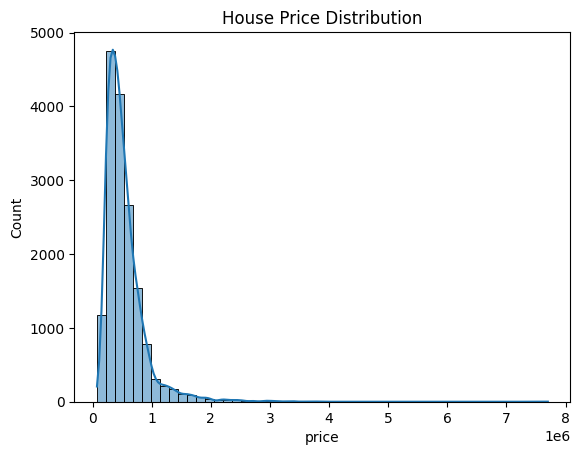

Skewness: 4.033062347507748


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(train_df["price"], bins=50, kde=True)
plt.title("House Price Distribution")
plt.show()

print("Skewness:", train_df["price"].skew())

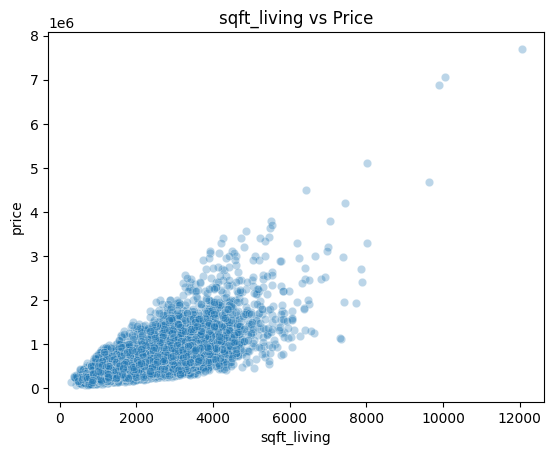

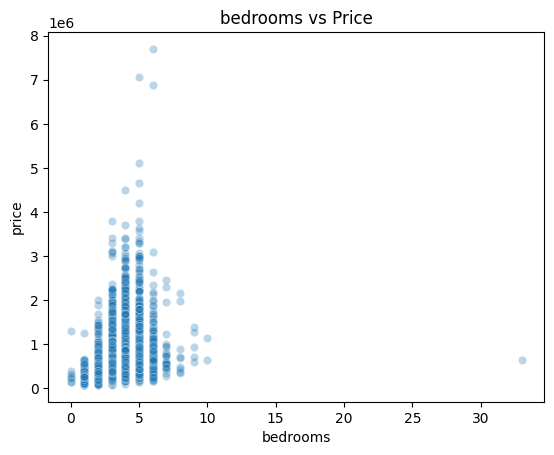

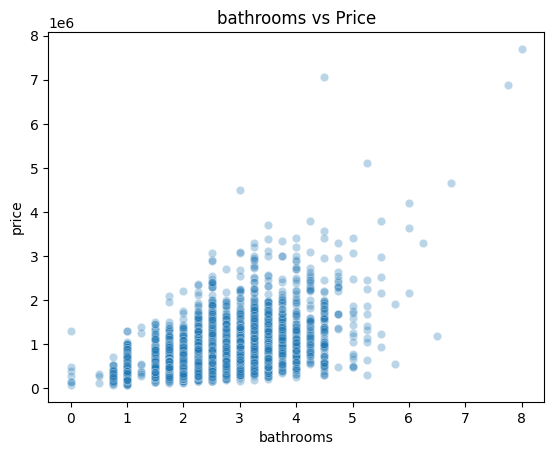

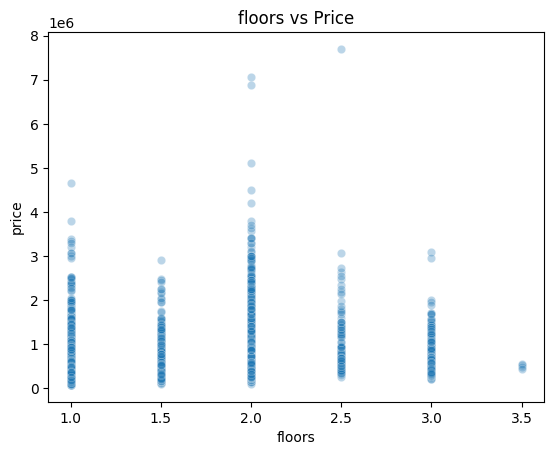

In [8]:
features = ["sqft_living", "bedrooms", "bathrooms", "floors"]

for col in features:
    plt.figure()
    sns.scatterplot(x=train_df[col], y=train_df["price"], alpha=0.3)
    plt.title(f"{col} vs Price")
    plt.show()

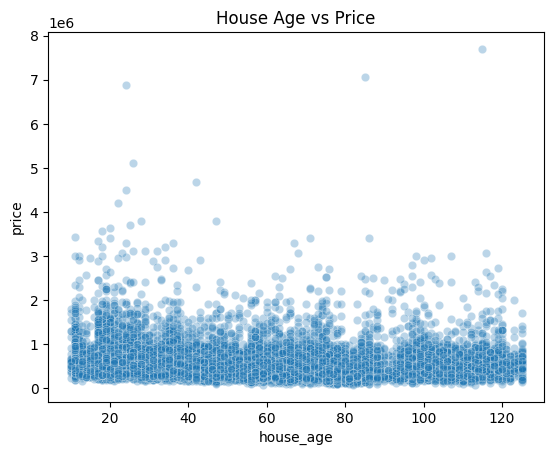

In [9]:
train_df["house_age"] = 2025 - train_df["yr_built"]
plt.figure()
sns.scatterplot(x=train_df["house_age"], y=train_df["price"], alpha=0.3)
plt.title("House Age vs Price")
plt.show()
train_df.drop(columns=["yr_built"], inplace=True)

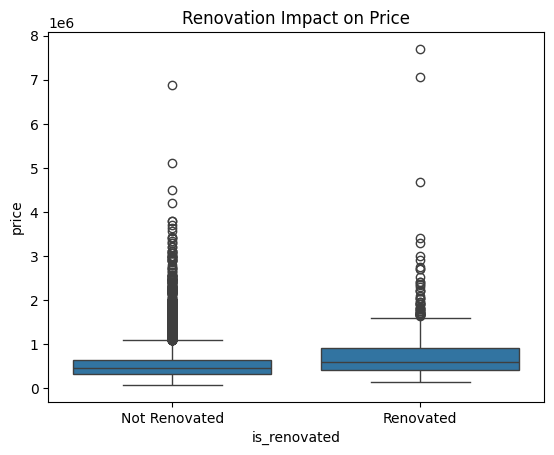

In [10]:
train_df["is_renovated"] = (train_df["yr_renovated"] > 0).astype(int)
plt.figure()
sns.boxplot(
    x="is_renovated",
    y="price",
    data=train_df
)
plt.xticks([0,1], ["Not Renovated", "Renovated"])
plt.title("Renovation Impact on Price")
plt.show()
train_df.drop(columns=["yr_renovated"], inplace=True)

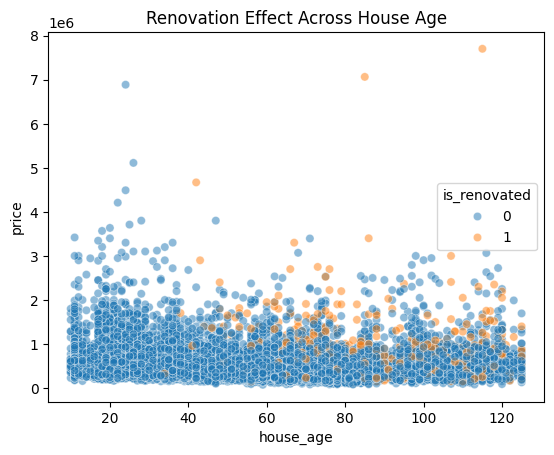

In [11]:
plt.figure()
sns.scatterplot(
    x="house_age",
    y="price",
    hue="is_renovated",
    data=train_df,
    alpha=0.5
)
plt.title("Renovation Effect Across House Age")
plt.show()

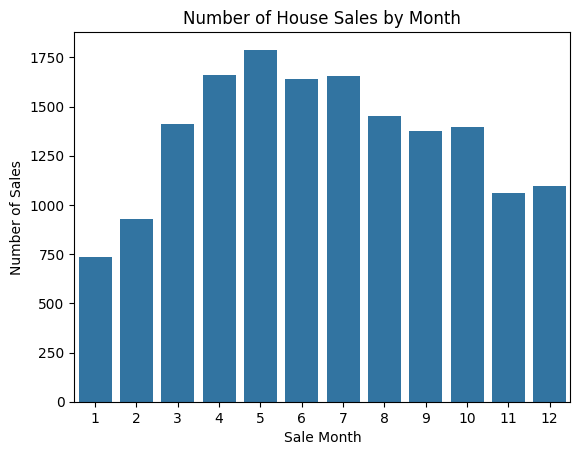

In [12]:
plt.figure()
sns.countplot(x="sale_month", data=train_df)
plt.xlabel("Sale Month")
plt.ylabel("Number of Sales")
plt.title("Number of House Sales by Month")
plt.show()

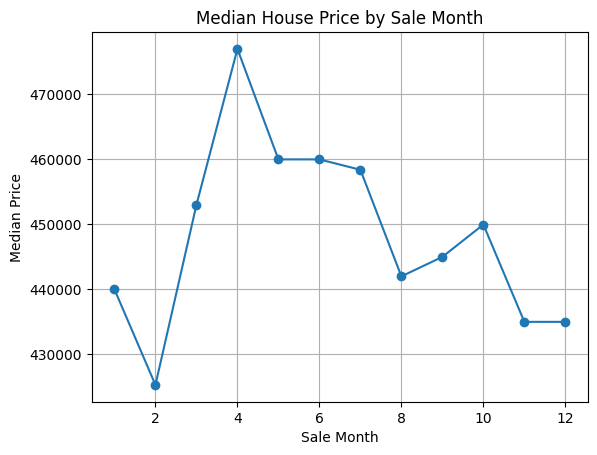

In [13]:
monthly_stats = train_df.groupby("sale_month")["price"].median()

plt.figure()
monthly_stats.plot(marker="o")
plt.xlabel("Sale Month")
plt.ylabel("Median Price")
plt.title("Median House Price by Sale Month")
plt.grid(True)
plt.show()

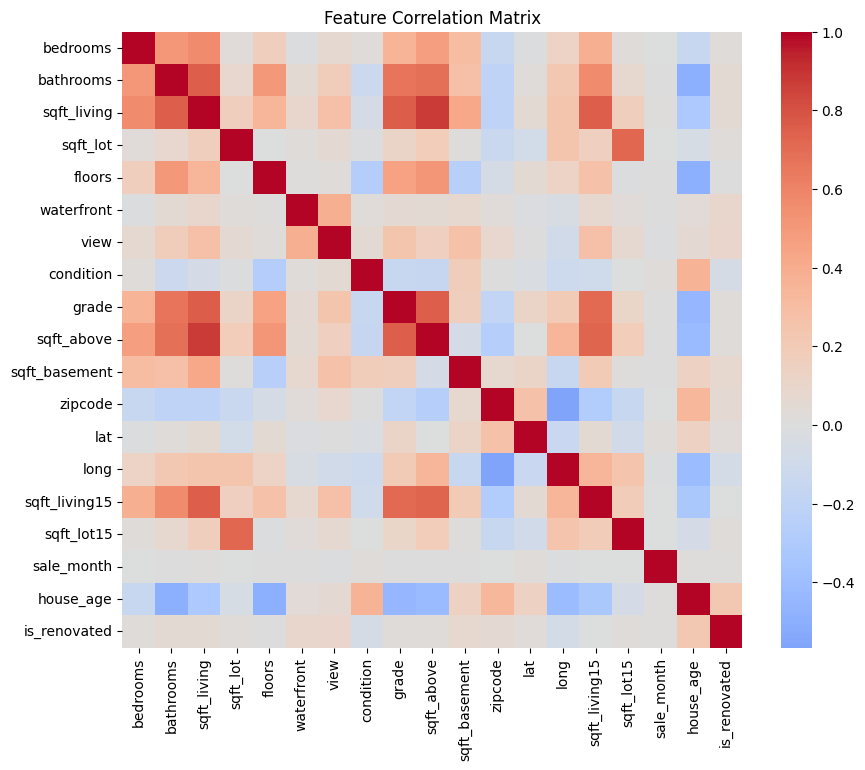

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(
    train_df.drop(columns=["price"]).corr(),
    cmap="coolwarm",
    center=0
)
plt.title("Feature Correlation Matrix")
plt.show()

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16209 non-null  int64  
 1   bedrooms       16209 non-null  int64  
 2   bathrooms      16209 non-null  float64
 3   sqft_living    16209 non-null  int64  
 4   sqft_lot       16209 non-null  int64  
 5   floors         16209 non-null  float64
 6   waterfront     16209 non-null  int64  
 7   view           16209 non-null  int64  
 8   condition      16209 non-null  int64  
 9   grade          16209 non-null  int64  
 10  sqft_above     16209 non-null  int64  
 11  sqft_basement  16209 non-null  int64  
 12  zipcode        16209 non-null  int64  
 13  lat            16209 non-null  float64
 14  long           16209 non-null  float64
 15  sqft_living15  16209 non-null  int64  
 16  sqft_lot15     16209 non-null  int64  
 17  sale_month     16209 non-null  int32  
 18  house_

# EDA(Images)

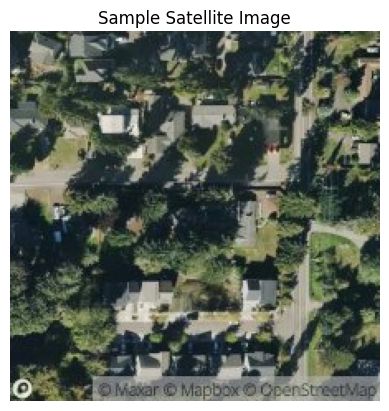

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = f"{TRAIN_IMG_DIR}/{train_ids.iloc[0]}.png"

img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")
plt.title("Sample Satellite Image")
plt.show()

In [17]:
import os

train_img_count = len(os.listdir(TRAIN_IMG_DIR))
test_img_count = len(os.listdir(TEST_IMG_DIR))

print(f"Train images: {train_img_count}")
print(f"Test images: {test_img_count}")
print(f"Total images: {train_img_count + test_img_count}")

Train images: 16110
Test images: 5396
Total images: 21506


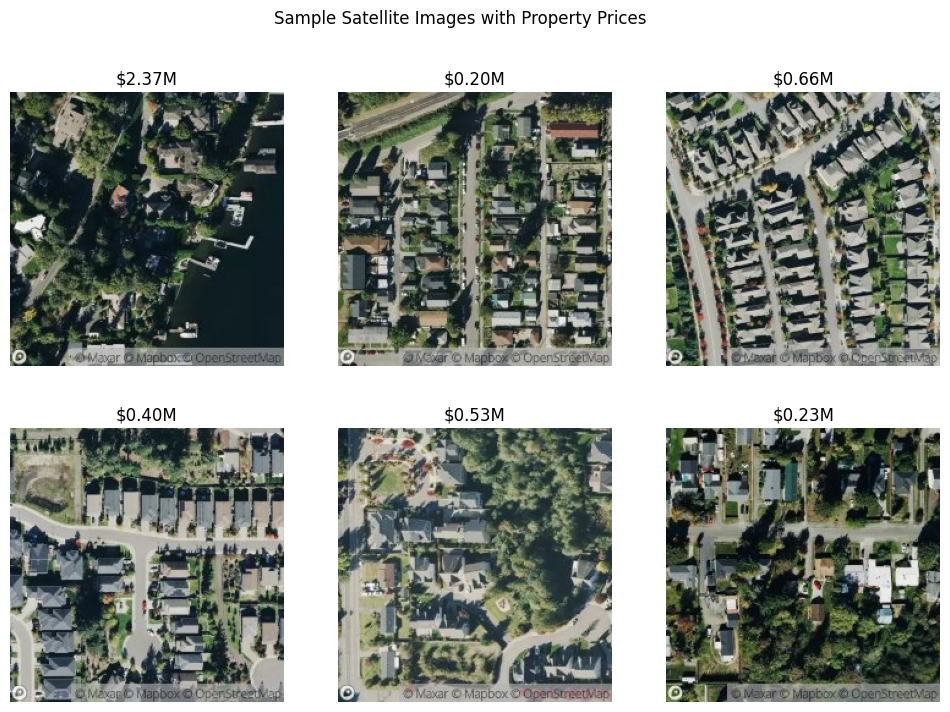

In [18]:
import random
sample_idxs = random.sample(range(len(train_df)), 6)

plt.figure(figsize=(12, 8))
for i, idx in enumerate(sample_idxs):
    pid = train_ids.iloc[idx]
    price = train_df.iloc[idx]["price"]
    img = Image.open(f"{TRAIN_IMG_DIR}/{pid}.png")

    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f"${price/1e6:.2f}M")
    plt.axis("off")

plt.suptitle("Sample Satellite Images with Property Prices")
plt.show()

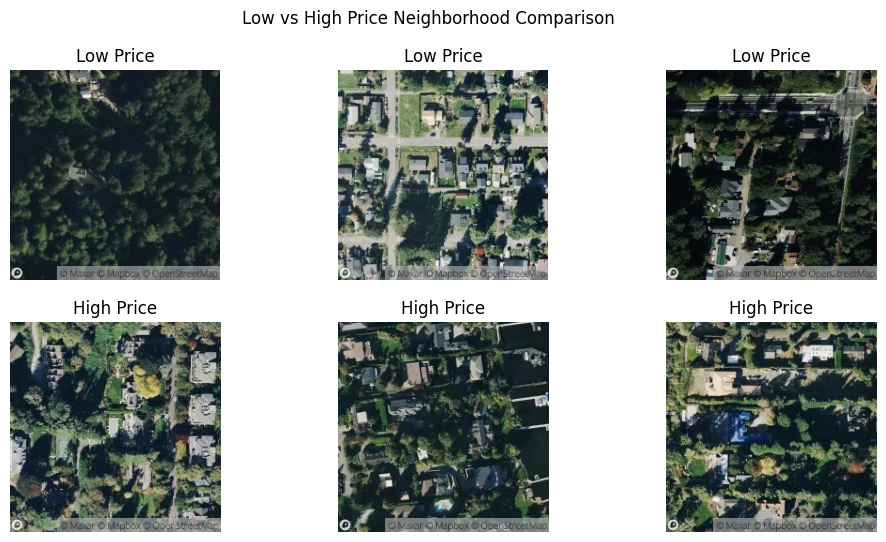

In [19]:
low_idxs = train_df.nsmallest(3, "price").index
high_idxs = train_df.nlargest(3, "price").index

plt.figure(figsize=(12, 6))

for i, idx in enumerate(low_idxs):
    img = Image.open(f"{TRAIN_IMG_DIR}/{train_ids.iloc[idx]}.png")
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title("Low Price")
    plt.axis("off")

for i, idx in enumerate(high_idxs):
    img = Image.open(f"{TRAIN_IMG_DIR}/{train_ids.iloc[idx]}.png")
    plt.subplot(2, 3, i+4)
    plt.imshow(img)
    plt.title("High Price")
    plt.axis("off")

plt.suptitle("Low vs High Price Neighborhood Comparison")
plt.show()

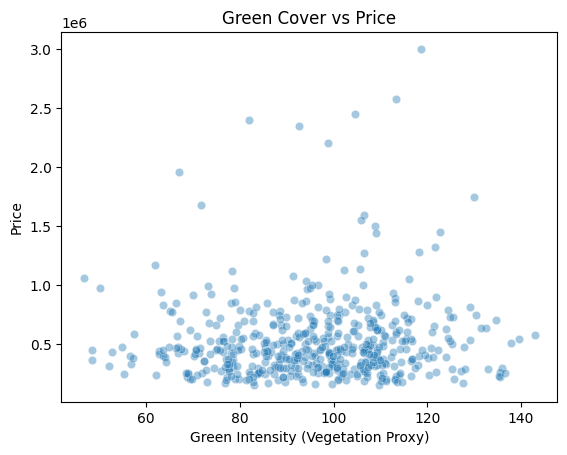

In [20]:
def green_intensity(img_path):
    img = np.array(Image.open(img_path))
    return img[:, :, 1].mean()

green_vals = []
prices = []

for idx in random.sample(range(len(train_df)), 500):
    pid = train_ids.iloc[idx]
    green_vals.append(green_intensity(f"{TRAIN_IMG_DIR}/{pid}.png"))
    prices.append(train_df.iloc[idx]["price"])

plt.figure()
sns.scatterplot(x=green_vals, y=prices, alpha=0.4)
plt.xlabel("Green Intensity (Vegetation Proxy)")
plt.ylabel("Price")
plt.title("Green Cover vs Price")
plt.show()

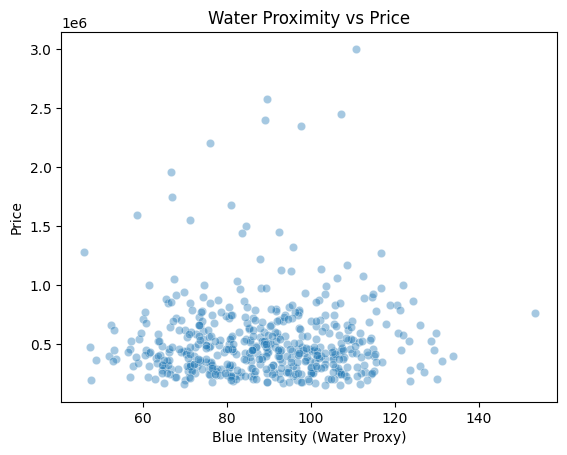

In [21]:
def blue_intensity(img_path):
    img = np.array(Image.open(img_path))
    return img[:, :, 2].mean()

blue_vals = []

for idx in random.sample(range(len(train_df)), 500):
    pid = train_ids.iloc[idx]
    blue_vals.append(blue_intensity(f"{TRAIN_IMG_DIR}/{pid}.png"))

plt.figure()
sns.scatterplot(x=blue_vals, y=prices, alpha=0.4)
plt.xlabel("Blue Intensity (Water Proxy)")
plt.ylabel("Price")
plt.title("Water Proximity vs Price")
plt.show()

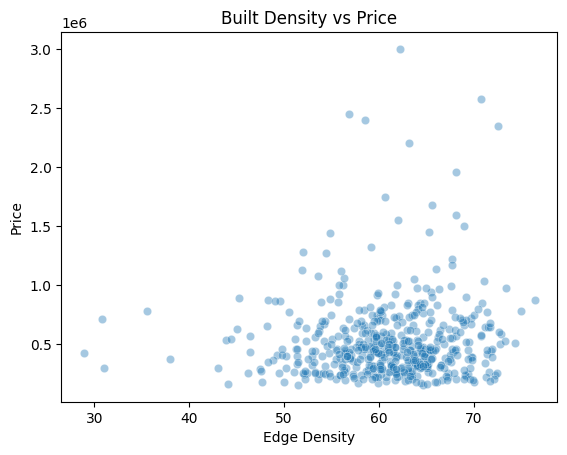

In [22]:
import cv2
def edge_density(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges.mean()

edge_vals = []

for idx in random.sample(range(len(train_df)), 500):
    pid = train_ids.iloc[idx]
    edge_vals.append(edge_density(f"{TRAIN_IMG_DIR}/{pid}.png"))

plt.figure()
sns.scatterplot(x=edge_vals, y=prices, alpha=0.4)
plt.xlabel("Edge Density")
plt.ylabel("Price")
plt.title("Built Density vs Price")
plt.show()

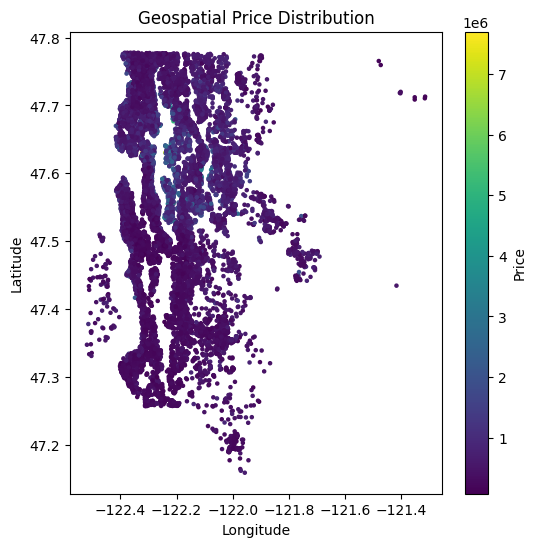

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(
    train_df["long"],
    train_df["lat"],
    c=train_df["price"],
    cmap="viridis",
    s=5
)
plt.colorbar(label="Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Price Distribution")
plt.show()

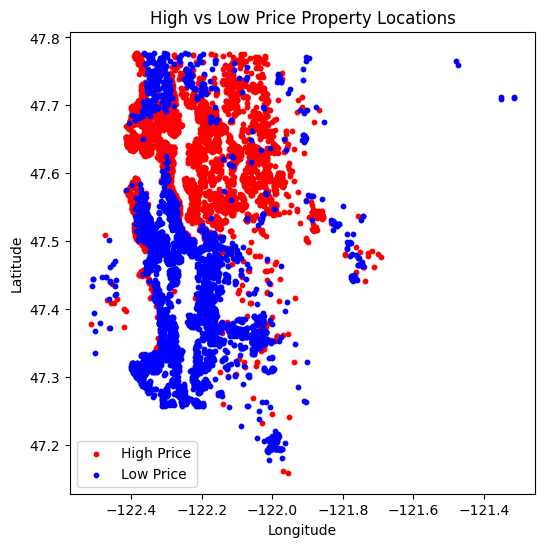

In [24]:
high_price = train_df[train_df["price"] > train_df["price"].quantile(0.75)]
low_price = train_df[train_df["price"] < train_df["price"].quantile(0.25)]

plt.figure(figsize=(6,6))
plt.scatter(high_price["long"], high_price["lat"],
            color="red", s=10, label="High Price")
plt.scatter(low_price["long"], low_price["lat"],
            color="blue", s=10, label="Low Price")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("High vs Low Price Property Locations")
plt.show()

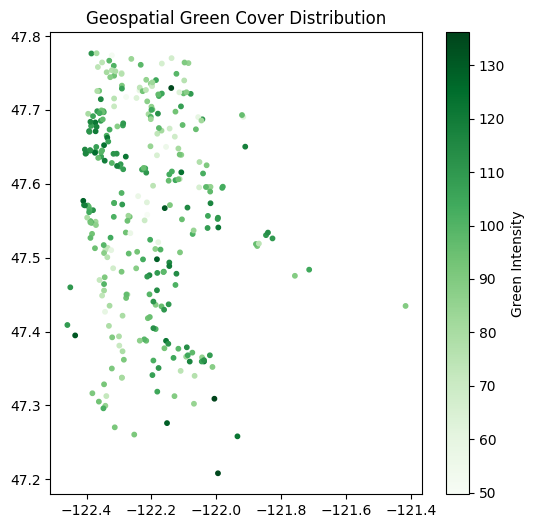

In [25]:
green_map = []

for idx in range(300):
    pid = train_ids.iloc[idx]
    green_map.append(green_intensity(f"{TRAIN_IMG_DIR}/{pid}.png"))

plt.figure(figsize=(6,6))
plt.scatter(
    train_df.iloc[:300]["long"],
    train_df.iloc[:300]["lat"],
    c=green_map,
    cmap="Greens",
    s=10
)
plt.colorbar(label="Green Intensity")
plt.title("Geospatial Green Cover Distribution")
plt.show()

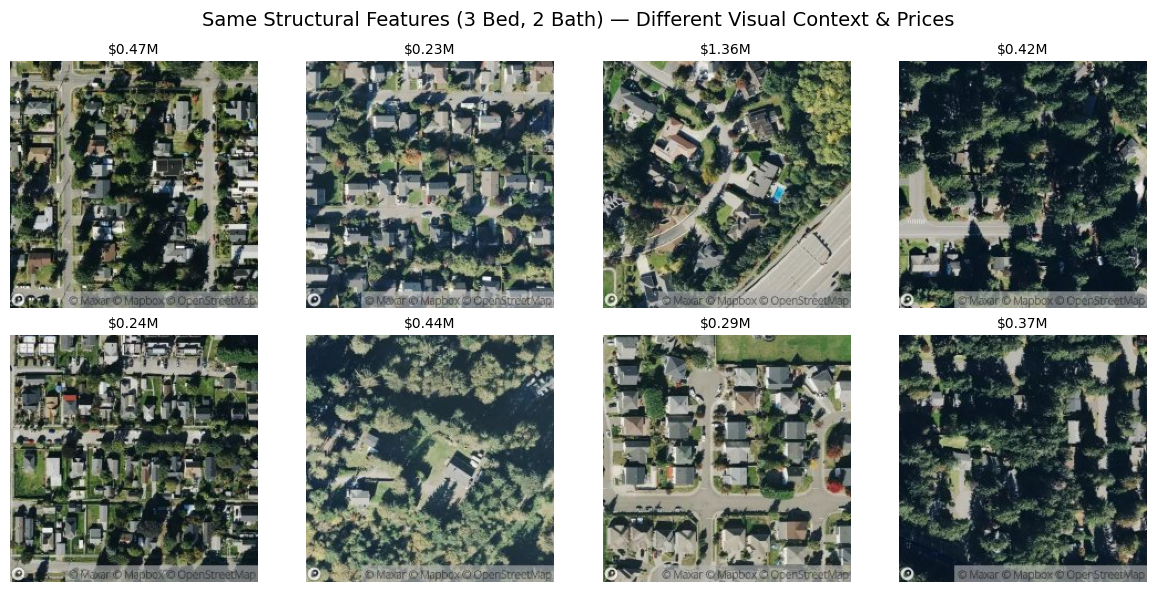

In [26]:
subset = train_df[(train_df["bedrooms"] == 3) & (train_df["bathrooms"] == 2)].sample(8)

plt.figure(figsize=(12, 6))

for i, idx in enumerate(subset.index):
    img = Image.open(f"{TRAIN_IMG_DIR}/{train_ids.iloc[idx]}.png")
    price = train_df.loc[idx, "price"]

    plt.subplot(2, 4, i + 1)
    plt.imshow(img)
    plt.title(f"${price/1e6:.2f}M", fontsize=10)
    plt.axis("off")

plt.suptitle(
    "Same Structural Features (3 Bed, 2 Bath) — Different Visual Context & Prices",
    fontsize=14)
plt.tight_layout()
plt.show()

In [27]:
import numpy as np

train_df["sale_month_sin"] = np.sin(2 * np.pi * train_df["sale_month"] / 12)
train_df["sale_month_cos"] = np.cos(2 * np.pi * train_df["sale_month"] / 12)

test_df["sale_month_sin"] = np.sin(2 * np.pi * test_df["sale_month"] / 12)
test_df["sale_month_cos"] = np.cos(2 * np.pi * test_df["sale_month"] / 12)

# Model Training

In [28]:
TABULAR_FEATURES = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "waterfront",
    "view",
    "condition",
    "grade",
    "sqft_above",
    "sqft_basement",
    "lat",
    "long",
    "house_age",
    "is_renovated",
    "sale_month_sin",
    "sale_month_cos"
]

In [29]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import torchvision.models as models
import torchvision.transforms as transforms


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
idx = np.arange(len(train_df))
train_idx, val_idx = train_test_split(idx, test_size=0.2, random_state=42)

# Image Only CNN

In [31]:
class ImageOnlyDataset(Dataset):
    def __init__(self, df, ids, img_dir, targets=None, transform=None):
        self.df = df.reset_index(drop=True)
        self.ids = ids.reset_index(drop=True)
        self.img_dir = img_dir
        self.targets = targets
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = f"{self.img_dir}/{self.ids.iloc[idx]}.png"
        img = Image.open(img_path).convert("RGB")

        if self.transform:
            img = self.transform(img)

        if self.targets is not None:
            return img, self.targets[idx]
        else:
            return img

In [32]:
class ImageOnlyRegressor(nn.Module):
    def __init__(self):
        super().__init__()

        resnet = models.resnet18(weights=None)
        self.cnn = nn.Sequential(*list(resnet.children())[:-1])

        self.regressor = nn.Sequential(
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        feat = self.cnn(x).view(x.size(0), -1)
        return self.regressor(feat).squeeze(1)

In [33]:
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],   
        std=[0.229, 0.224, 0.225]    
    )
])

In [34]:
y_log = torch.tensor(
    np.log1p(train_df["price"].values),
    dtype=torch.float32
)

train_img_dataset = ImageOnlyDataset(
    train_df.iloc[train_idx],
    train_ids.iloc[train_idx],
    TRAIN_IMG_DIR,
    targets=y_log[train_idx],
    transform=image_transform
)

val_img_dataset = ImageOnlyDataset(
    train_df.iloc[val_idx],
    train_ids.iloc[val_idx],
    TRAIN_IMG_DIR,
    targets=y_log[val_idx],
    transform=image_transform
)

train_loader = DataLoader(train_img_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_img_dataset, batch_size=32, shuffle=False)

In [35]:
def train_epoch_image(model, loader, optimizer, criterion):
    model.train()
    total = 0

    for img, y in loader:
        img, y = img.to(device), y.to(device)

        optimizer.zero_grad()
        pred = model(img)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()

        total += loss.item() * len(y)

    return total / len(loader.dataset)


def eval_image(model, loader):
    model.eval()
    preds, ys = [], []

    with torch.no_grad():
        for img, y in loader:
            img = img.to(device)
            pred = model(img)

            preds.append(pred.cpu().numpy())
            ys.append(y.numpy())

    preds = np.concatenate(preds)
    ys = np.concatenate(ys)

    rmse = np.sqrt(mean_squared_error(ys, preds))
    r2 = r2_score(ys, preds)

    return rmse, r2

In [36]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [37]:
model = ImageOnlyRegressor().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

EPOCHS = 10

for epoch in range(EPOCHS):
    train_loss = train_epoch_image(model, train_loader, optimizer, criterion)
    rmse, r2 = eval_image(model, val_loader)

    print(
        f"Epoch {epoch+1:02d} | "
        f"Train log-MSE {train_loss:.4f} | "
        f"Val RMSE {rmse:.4f} | "
        f"R² {r2:.4f}"
    )

Epoch 01 | Train log-MSE 8.4701 | Val RMSE 0.5182 | R² 0.0270
Epoch 02 | Train log-MSE 0.2204 | Val RMSE 0.4973 | R² 0.1037
Epoch 03 | Train log-MSE 0.1862 | Val RMSE 0.4911 | R² 0.1259
Epoch 04 | Train log-MSE 0.1659 | Val RMSE 0.7033 | R² -0.7923
Epoch 05 | Train log-MSE 0.1360 | Val RMSE 0.5539 | R² -0.1119
Epoch 06 | Train log-MSE 0.1026 | Val RMSE 0.4245 | R² 0.3471
Epoch 07 | Train log-MSE 0.0727 | Val RMSE 0.4569 | R² 0.2435
Epoch 08 | Train log-MSE 0.0583 | Val RMSE 0.4454 | R² 0.2811
Epoch 09 | Train log-MSE 0.0510 | Val RMSE 0.4471 | R² 0.2756
Epoch 10 | Train log-MSE 0.0426 | Val RMSE 0.5286 | R² -0.0124


# Multimodal Residual

In [38]:
y = np.log1p(train_df["price"].values)

In [39]:
scaler = StandardScaler()
X_tab = scaler.fit_transform(train_df[TABULAR_FEATURES])

X_tab_tensor = torch.tensor(X_tab, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

image_transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])

In [40]:
from sklearn.model_selection import train_test_split

idx = np.arange(len(train_df))
train_idx, val_idx = train_test_split(idx, test_size=0.2, random_state=42)

In [41]:
class RealEstateDataset(Dataset):
    def __init__(self, df, ids, img_dir, tab_tensor, targets=None, transform=None):
        self.df = df.reset_index(drop=True)
        self.ids = ids.reset_index(drop=True)
        self.img_dir = img_dir
        self.tab = tab_tensor
        self.targets = targets
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = f"{self.img_dir}/{self.ids.iloc[idx]}.png"
        img = Image.open(img_path).convert("RGB")

        if self.transform:
            img = self.transform(img)

        tab = self.tab[idx]

        if self.targets is not None:
            return img, tab, self.targets[idx]
        else:
            return img, tab

In [42]:
train_loader = DataLoader(
    RealEstateDataset(
        train_df.iloc[train_idx],
        train_ids.iloc[train_idx],
        TRAIN_IMG_DIR,
        X_tab_tensor[train_idx],
        y_tensor[train_idx],
        image_transform
    ),
    batch_size=32,
    shuffle=True,
    num_workers=0
)

val_loader = DataLoader(
    RealEstateDataset(
        train_df.iloc[val_idx],
        train_ids.iloc[val_idx],
        TRAIN_IMG_DIR,
        X_tab_tensor[val_idx],
        y_tensor[val_idx],
        image_transform
    ),
    batch_size=32,
    shuffle=False,
    num_workers=0
)

In [43]:
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights

class MultimodalResidualModel(nn.Module):
    def __init__(self, tab_dim):
        super().__init__()

        resnet = resnet18(weights=None)
        self.cnn = nn.Sequential(*list(resnet.children())[:-1])

        for p in self.cnn.parameters():
            p.requires_grad = False

        self.image_head = nn.Sequential(
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

        self.tabular_net = nn.Sequential(
            nn.Linear(tab_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 1)
        )

    def forward(self, img, tab):
        img_feat = self.cnn(img).view(img.size(0), -1)
        img_res  = self.image_head(img_feat).squeeze(1)

        base = self.tabular_net(tab).squeeze(1)

        return base + img_res

In [68]:
cnn_model = MultimodalResidualModel(X_tab_tensor.shape[1]).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=1e-3)

In [72]:
def train_epoch(loader):
    cnn_model.train()
    total = 0
    for img, tab, y in loader:
        img, tab, y = img.to(device), tab.to(device), y.to(device)

        optimizer.zero_grad()
        pred = cnn_model(img, tab)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()

        total += loss.item() * len(y)
    return total / len(loader.dataset)

def eval_epoch(loader):
    cnn_model.eval()
    total = 0
    with torch.no_grad():
        for img, tab, y in loader:
            img, tab, y = img.to(device), tab.to(device), y.to(device)
            pred = cnn_model(img, tab)
            total += criterion(pred, y).item() * len(y)
    return total / len(loader.dataset)

In [73]:
for epoch in range(9):
    print(f"Epoch {epoch+1}")
    tr = train_epoch(train_loader)
    va = eval_epoch(val_loader)
    print(f"Epoch {epoch+1} | Train log-MSE {tr:.4f} | Val log-MSE {va:.4f}")

Epoch 1
Epoch 1 | Train log-MSE 3.2177 | Val log-MSE 0.1535
Epoch 2
Epoch 2 | Train log-MSE 0.1087 | Val log-MSE 0.0930
Epoch 3
Epoch 3 | Train log-MSE 0.0912 | Val log-MSE 0.1133
Epoch 4
Epoch 4 | Train log-MSE 0.0825 | Val log-MSE 0.0815
Epoch 5
Epoch 5 | Train log-MSE 0.0764 | Val log-MSE 0.0785
Epoch 6
Epoch 6 | Train log-MSE 0.0740 | Val log-MSE 0.0830
Epoch 7
Epoch 7 | Train log-MSE 0.0692 | Val log-MSE 0.0632
Epoch 8
Epoch 8 | Train log-MSE 0.0646 | Val log-MSE 0.0707
Epoch 9
Epoch 9 | Train log-MSE 0.0644 | Val log-MSE 0.0608


In [74]:
from sklearn.metrics import r2_score
import numpy as np

cnn_model.eval()

preds = []
targets = []

with torch.no_grad():
    for img, tab, y in val_loader:
        img = img.to(device)
        tab = tab.to(device)

        p = cnn_model(img, tab)

        preds.append(p.cpu().numpy())
        targets.append(y.cpu().numpy())

preds = np.concatenate(preds)
targets = np.concatenate(targets)

r2 = r2_score(targets, preds)
print("R² (log-space):", r2)

R² (log-space): 0.7795976996421814


# XGBoost over tabular data

In [48]:
from sklearn.model_selection import train_test_split
X = train_df[TABULAR_FEATURES].values
y = np.log1p(train_df["price"].values)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)

In [50]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

In [51]:
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [52]:
val_preds = xgb_model.predict(X_val)

rmse_log = np.sqrt(mean_squared_error(y_val, val_preds))
r2_log = r2_score(y_val, val_preds)

print("XGBoost RMSE (log):", rmse_log)
print("XGBoost R² (log):", r2_log)

XGBoost RMSE (log): 0.16324739075544945
XGBoost R² (log): 0.903426873986678


# Classical fusion via PCA 

In [53]:
import torch
import torchvision.models as models
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

resnet = models.resnet18(weights=None)
cnn = nn.Sequential(*list(resnet.children())[:-1]).to(device)
cnn.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [54]:
import numpy as np
from torchvision import transforms
from PIL import Image
import os

image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

def extract_image_embeddings(ids, img_dir):
    embeddings = []

    with torch.no_grad():
        for pid in ids:
            img_path = f"{img_dir}/{pid}.png"
            img = Image.open(img_path).convert("RGB")
            img = image_transform(img).unsqueeze(0).to(device)

            feat = cnn(img).view(-1)   # (512,)
            embeddings.append(feat.cpu().numpy())

    return np.array(embeddings)

In [55]:
X_img = extract_image_embeddings(train_ids, TRAIN_IMG_DIR)
print(X_img.shape)   

(16209, 512)


In [56]:
from sklearn.preprocessing import StandardScaler
scaler_img = StandardScaler()
X_img_scaled = scaler_img.fit_transform(X_img)

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, random_state=42)

X_img_pca = pca.fit_transform(X_img_scaled)

print("Total explained variance:", pca.explained_variance_ratio_.sum())

Total explained variance: 0.73127186


In [58]:
scaler_tab = StandardScaler()

X_tab = train_df[TABULAR_FEATURES].values
X_tab_scaled = scaler_tab.fit_transform(X_tab)

In [59]:
import numpy as np

X_fusion = np.hstack([X_tab_scaled, X_img_pca])
print("Fusion shape:", X_fusion.shape)

Fusion shape: (16209, 67)


In [60]:
X_train = X_fusion[train_idx]
X_val   = X_fusion[val_idx]

y_train = y[train_idx]
y_val   = y[val_idx]

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    r2 = r2_score(y_val, preds)
    return rmse, r2

In [62]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [63]:
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001),
    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        random_state=42,
        n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )
}

In [64]:
import pandas as pd

results = []

for name, model in models.items():
    rmse, r2 = evaluate_model(model, X_train, y_train, X_val, y_val)
    results.append({
        "Model": name,
        "RMSE (log)": rmse,
        "R² (log)": r2
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="RMSE (log)")

Model  RMSE (log)  R² (log)
4            XGBoost    0.169306  0.896126
3  Gradient Boosting    0.172757  0.891848
2      Random Forest    0.189460  0.869923
0              Ridge    0.241656  0.788378
1              Lasso    0.241707  0.788289

# GradCAM

In [65]:
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self._register_hooks()

    def _register_hooks(self):

        def forward_hook(module, input, output):
            self.activations = output
            output.retain_grad()   

        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0]

        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_full_backward_hook(backward_hook)

    def generate(self, img, tab):
        self.model.zero_grad()

        img.requires_grad_(True)   

        output = self.model(img, tab)

        # Backprop from scalar output
        output.backward()

        if self.gradients is None or self.activations is None:
            raise RuntimeError("Grad-CAM failed: gradients or activations not captured")

        grads = self.gradients
        acts = self.activations

        weights = grads.mean(dim=(2, 3), keepdim=True)
        cam = (weights * acts).sum(dim=1)
        cam = torch.relu(cam)

        cam = cam[0].detach().cpu().numpy()
        cam = cv2.resize(cam, (224, 224))
        cam = (cam - cam.min()) / (cam.max() + 1e-8)

        return cam

In [79]:
target_layer = cnn_model.cnn[-2]   
gradcam = GradCAM(cnn_model, target_layer)

In [80]:
train_dataset = RealEstateDataset(
    train_df.iloc[train_idx],
    train_ids.iloc[train_idx],
    TRAIN_IMG_DIR,
    X_tab_tensor[train_idx],
    y_tensor[train_idx],
    image_transform
)

val_dataset = RealEstateDataset(
    train_df.iloc[val_idx],
    train_ids.iloc[val_idx],
    TRAIN_IMG_DIR,
    X_tab_tensor[val_idx],
    y_tensor[val_idx],
    image_transform
)

In [81]:
idx = 0  # change later

img, tab, y = val_dataset[idx]

img = img.unsqueeze(0).to(device)
tab = tab.unsqueeze(0).to(device)

In [82]:
cam = gradcam.generate(img, tab)

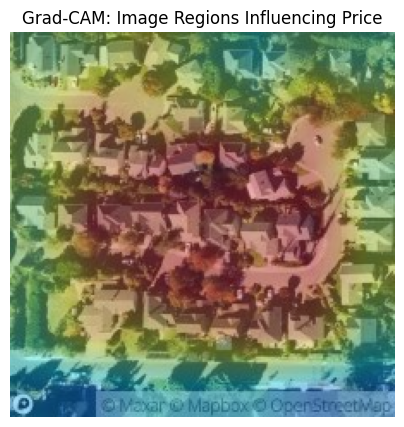

In [83]:
img_np = img[0].detach().permute(1,2,0).cpu().numpy()
img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min())

heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
heatmap = heatmap / 255.0

overlay = 0.7 * img_np + 0.3 * heatmap
overlay = np.clip(overlay, 0, 1)

plt.figure(figsize=(5,5))
plt.imshow(overlay)
plt.axis("off")
plt.title("Grad-CAM: Image Regions Influencing Price")
plt.show()

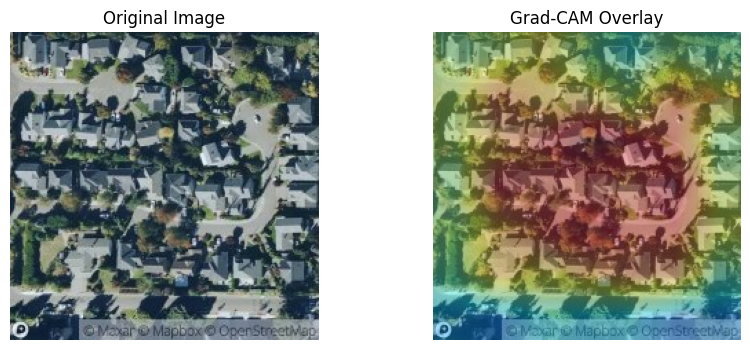

In [84]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img_np)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(overlay)
plt.title("Grad-CAM Overlay")
plt.axis("off")

plt.show()

In [85]:
import numpy as np

prices = np.array([val_dataset[i][2].item() for i in range(len(val_dataset))])

low_idx  = prices.argsort()[:2]          # lowest 2
high_idx = prices.argsort()[-2:]         # highest 2
mid_idx  = [prices.argsort()[len(prices)//2]]

sample_indices = list(low_idx) + mid_idx + list(high_idx)

In [86]:
def plot_side_by_side(idx,save=False):
    img, tab, y = val_dataset[idx]

    img = img.unsqueeze(0).to(device)
    tab = tab.unsqueeze(0).to(device)

    cam = gradcam.generate(img, tab)

    img_np = img[0].detach().permute(1,2,0).cpu().numpy()
    img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min())

    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET) / 255.0
    overlay = np.clip(0.6 * img_np + 0.4 * heatmap, 0, 1)

    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.imshow(img_np)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(overlay)
    plt.title(f"Grad-CAM | Price(log): {y.item():.2f}")
    plt.axis("off")

    if save:
        plt.savefig(f"gradcam_{idx}.png", bbox_inches="tight", dpi=200)

    plt.show()

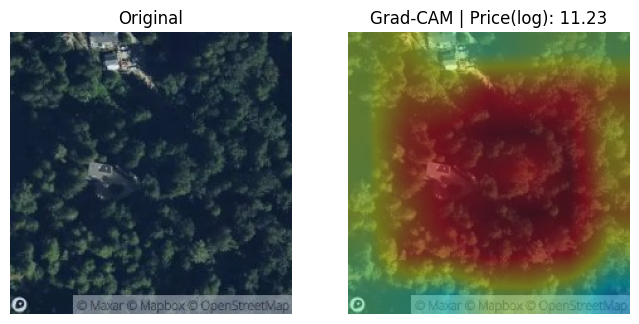

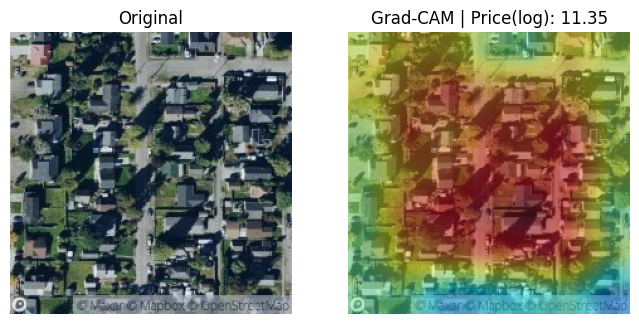

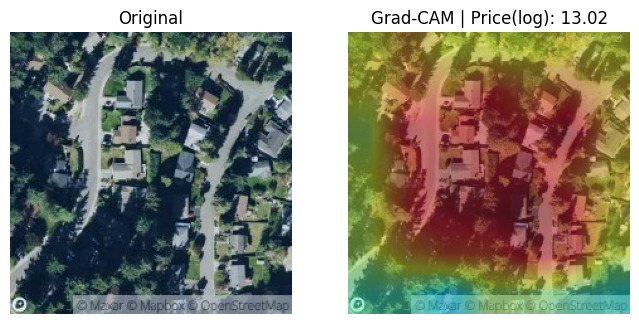

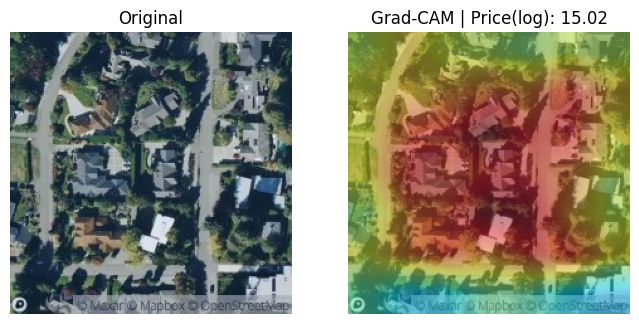

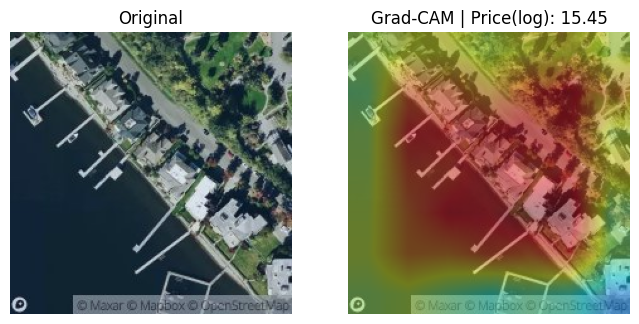

In [87]:
for idx in sample_indices:
    plot_side_by_side(idx,save=True)

In [88]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        5404 non-null   int64  
 1   bathrooms       5404 non-null   float64
 2   sqft_living     5404 non-null   int64  
 3   sqft_lot        5404 non-null   int64  
 4   floors          5404 non-null   float64
 5   waterfront      5404 non-null   int64  
 6   view            5404 non-null   int64  
 7   condition       5404 non-null   int64  
 8   grade           5404 non-null   int64  
 9   sqft_above      5404 non-null   int64  
 10  sqft_basement   5404 non-null   int64  
 11  yr_built        5404 non-null   int64  
 12  yr_renovated    5404 non-null   int64  
 13  zipcode         5404 non-null   int64  
 14  lat             5404 non-null   float64
 15  long            5404 non-null   float64
 16  sqft_living15   5404 non-null   int64  
 17  sqft_lot15      5404 non-null   i

In [89]:
test_df["house_age"] = 2025 - test_df["yr_built"]
test_df["is_renovated"] = (test_df["yr_renovated"] > 0).astype(int)

In [90]:
X_test = test_df[TABULAR_FEATURES]

In [91]:
test_pred_log = xgb_model.predict(X_test)
test_pred_price = np.expm1(test_pred_log)

In [92]:
submission = pd.DataFrame({
    "id": test_ids.values,
    "predicted_price": test_pred_price
})

In [93]:
submission.to_csv("final_price_predictions.csv", index=False)

In [94]:
import os
os.listdir("/kaggle/working")

['gradcam_451.png',
 'gradcam_2221.png',
 'final_price_predictions.csv',
 '.virtual_documents',
 'gradcam_2681.png',
 'gradcam_2637.png',
 'gradcam_2970.png']

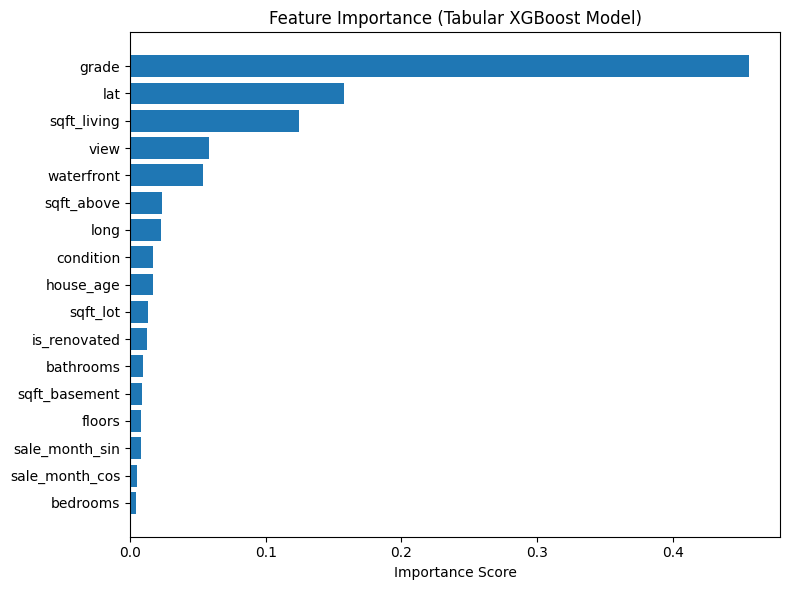

In [95]:
import numpy as np
import matplotlib.pyplot as plt

importances = xgb_model.feature_importances_
feature_names = TABULAR_FEATURES

idx = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.barh(
    np.array(feature_names)[idx],
    importances[idx]
)
plt.xlabel("Importance Score")
plt.title("Feature Importance (Tabular XGBoost Model)")
plt.tight_layout()
plt.show()

In [101]:
from sklearn.model_selection import train_test_split
X = train_df[TABULAR_FEATURES].values
y = np.log1p(train_df["price"].values)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)

In [102]:
# True values (log-price)
trues = y_val

# Predictions from tabular model
preds = xgb_model.predict(X_val)

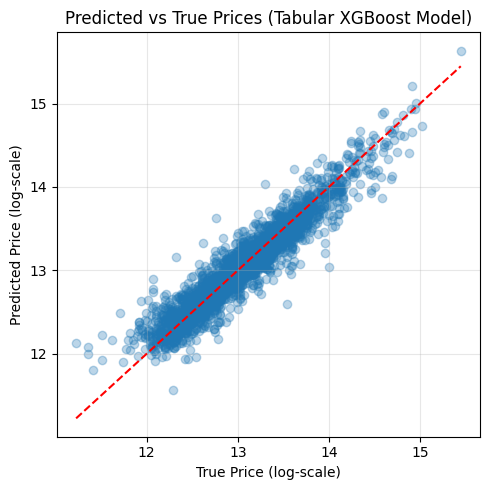

In [103]:
plt.figure(figsize=(5,5))
plt.scatter(trues, preds, alpha=0.3)
plt.plot(
    [trues.min(), trues.max()],
    [trues.min(), trues.max()],
    linestyle="--",
    color="red"
)
plt.xlabel("True Price (log-scale)")
plt.ylabel("Predicted Price (log-scale)")
plt.title("Predicted vs True Prices (Tabular XGBoost Model)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()